In [260]:
import fbprophet

In [261]:
path = r"D:\Asus\Documents\archive\AAPL.csv"

In [262]:
import pandas as pd

In [263]:
from fbprophet import Prophet

In [264]:
file= pd.read_csv(path, date_parser='Date')

In [265]:
file.set_index('Date', inplace=True)

In [266]:
file.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0
2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0
2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0
2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0
2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0


In [267]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,9822.0,3.035006e+01,5.344302e+01,0.198661,1.062500e+00,1.709286e+00,3.039393e+01,2.679000e+02
High,9822.0,3.064063e+01,5.390836e+01,0.198661,1.085357e+00,1.742366e+00,3.055571e+01,2.680000e+02
Low,9822.0,3.004830e+01,5.298366e+01,0.196429,1.043571e+00,1.671429e+00,2.986536e+01,2.653900e+02
Close,9822.0,3.035294e+01,5.346427e+01,0.196429,1.066964e+00,1.712857e+00,3.023321e+01,2.671000e+02
Adj Close,9822.0,2.836403e+01,5.160359e+01,0.156008,9.140892e-01,1.452872e+00,2.630595e+01,2.671000e+02
Volume,9822.0,8.620720e+07,8.623138e+07,347200.000000,3.318138e+07,5.798940e+07,1.076320e+08,1.855410e+09


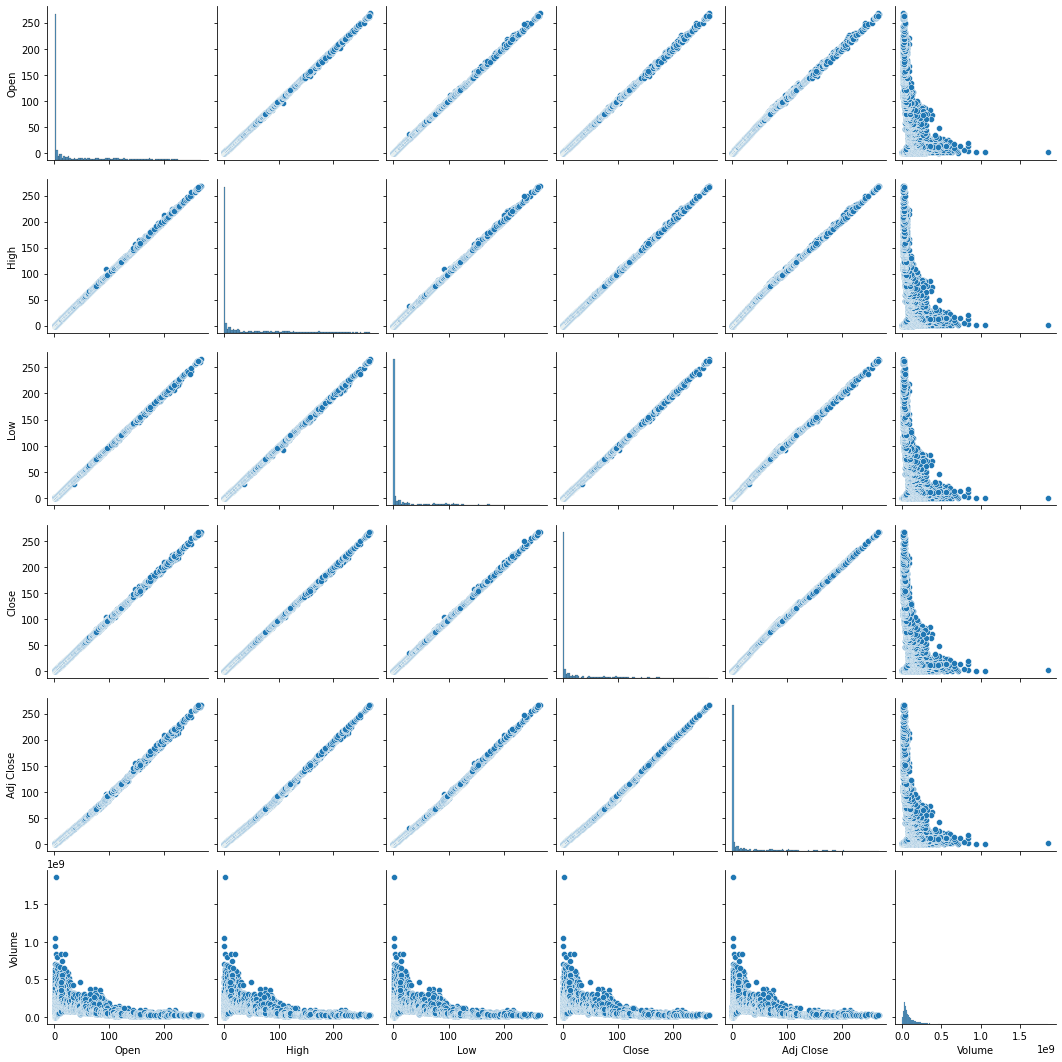

In [230]:
import seaborn as sns
sns.pairplot(file)

In [268]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 1980-12-12 to 2019-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9822 non-null   float64
 1   High       9822 non-null   float64
 2   Low        9822 non-null   float64
 3   Close      9822 non-null   float64
 4   Adj Close  9822 non-null   float64
 5   Volume     9822 non-null   float64
dtypes: float64(6)
memory usage: 537.2+ KB


In [269]:
file.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [270]:
file.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis= 1, inplace=True)

In [271]:
file.set_index(pd.to_datetime(file.index),inplace=True)

In [272]:
f2=file.resample("M").mean()

In [273]:
import matplotlib.pyplot as plt

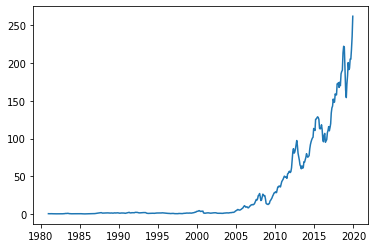

In [274]:
plt.plot(f2['Close'])

In [313]:
file['Close'].quantile(0.5)

1.712857

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

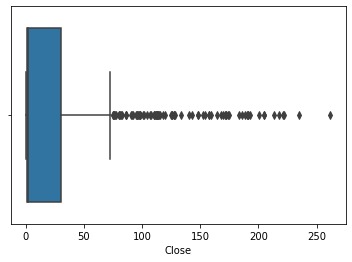

In [311]:
sns.boxplot(f2['Close'])

In [315]:
f2['Close'].min()

0.22927280952380952

In [277]:
# f2[(f2['Close']>(f2['Close'].quantile(0.75)-f2['Close'].quantile(0.25))*1.5) | (f2['Close']<(f2['Close'].quantile(0.75)-f2['Close'].quantile(0.25))*1.5)]

In [278]:
iqr_1_5=(f2['Close'].quantile(0.75)-f2['Close'].quantile(0.25))*1.5

In [279]:
outliers=f2[(f2['Close']>f2['Close'].quantile(0.75)+iqr_1_5) | (f2['Close']<f2['Close'].quantile(0.25)-iqr_1_5)]

<AxesSubplot:xlabel='Close', ylabel='Density'>

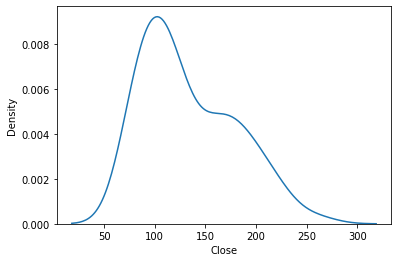

In [280]:
sns.kdeplot(outliers['Close'])

In [281]:
outliers['Close']= f2['Close'].mean() 

<ipython-input-281-88bf69606614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Close']= f2['Close'].mean()


In [283]:
outliers.index

DatetimeIndex(['2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30',
               '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31',
               '2012-11-30', '2012-12-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [284]:
outliers.shape

(83, 1)

In [296]:
f3= f2.copy()

In [299]:
f3[(f2['Close']>f2['Close'].quantile(0.75)+iqr_1_5) | (f2['Close']<f2['Close'].quantile(0.25)-iqr_1_5)]= f2['Close'].mean()

In [300]:
f3

,Close
Date,
1980-12-31,0.543613
1981-01-31,0.565264
1981-02-28,0.471570
1981-03-31,0.443486
1981-04-30,0.486182
...,...
2019-07-31,30.424447
2019-08-31,30.424447
2019-09-30,30.424447


In [301]:
f2

,Close
Date,
1980-12-31,0.543613
1981-01-31,0.565264
1981-02-28,0.471570
1981-03-31,0.443486
1981-04-30,0.486182
...,...
2019-07-31,205.216364
2019-08-31,204.957728
2019-09-30,217.994999


<AxesSubplot:xlabel='Close'>

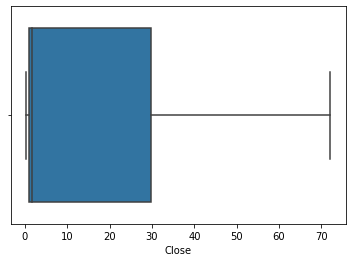

In [303]:
sns.boxplot(f3['Close'])

<AxesSubplot:xlabel='Close', ylabel='Count'>

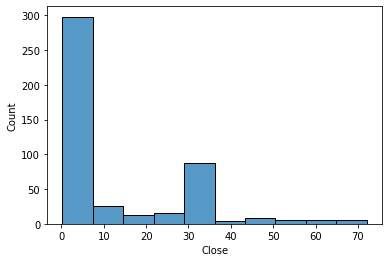

In [307]:
sns.histplot(f3['Close'])

C:\Users\Asus\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

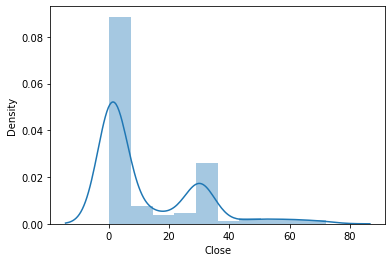

In [308]:
sns.distplot(f3['Close'])

In [316]:
import statsmodels.tsa.seasonal as sts

In [317]:
f2.isna().sum()

Close    0
dtype: int64

In [318]:
file.fillna(method='ffill',axis=1,inplace=True)

In [320]:
compo=sts.seasonal_decompose(f3)

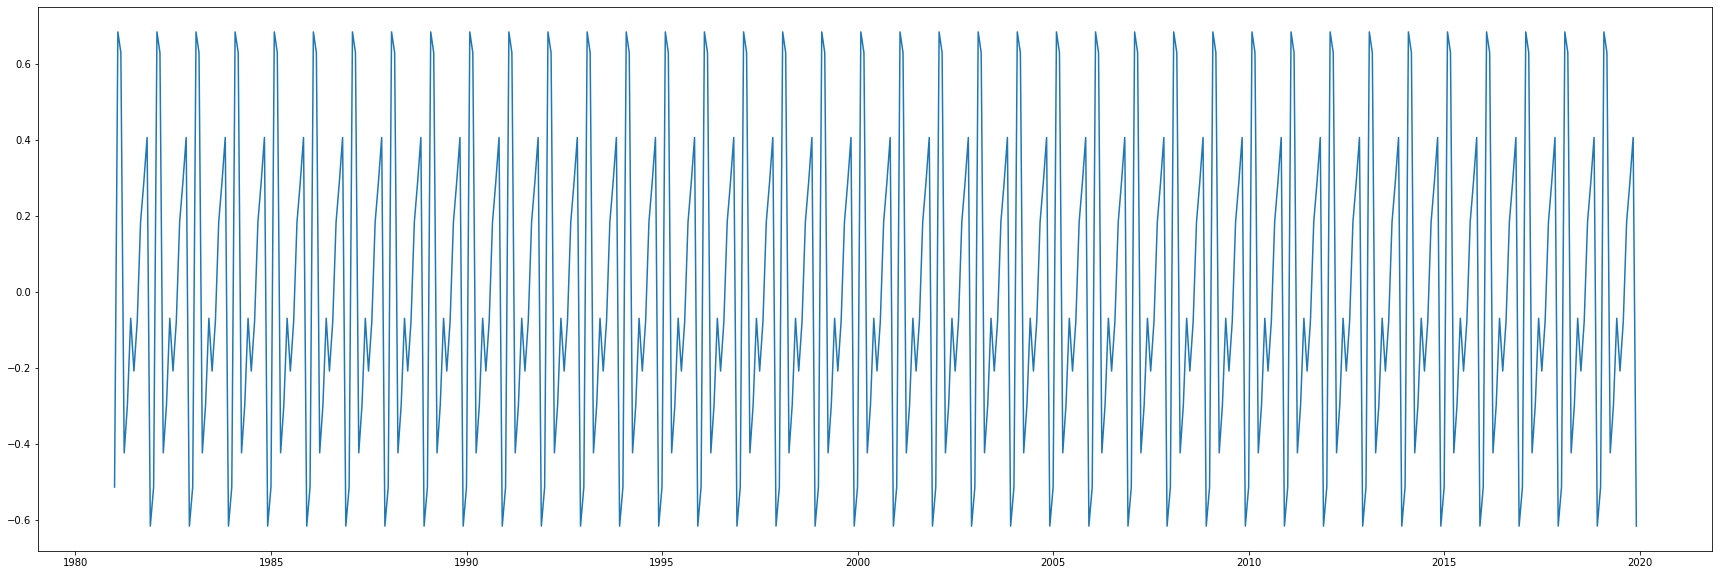

In [321]:
plt.figure(figsize=[30,10])
plt.plot(compo.seasonal)

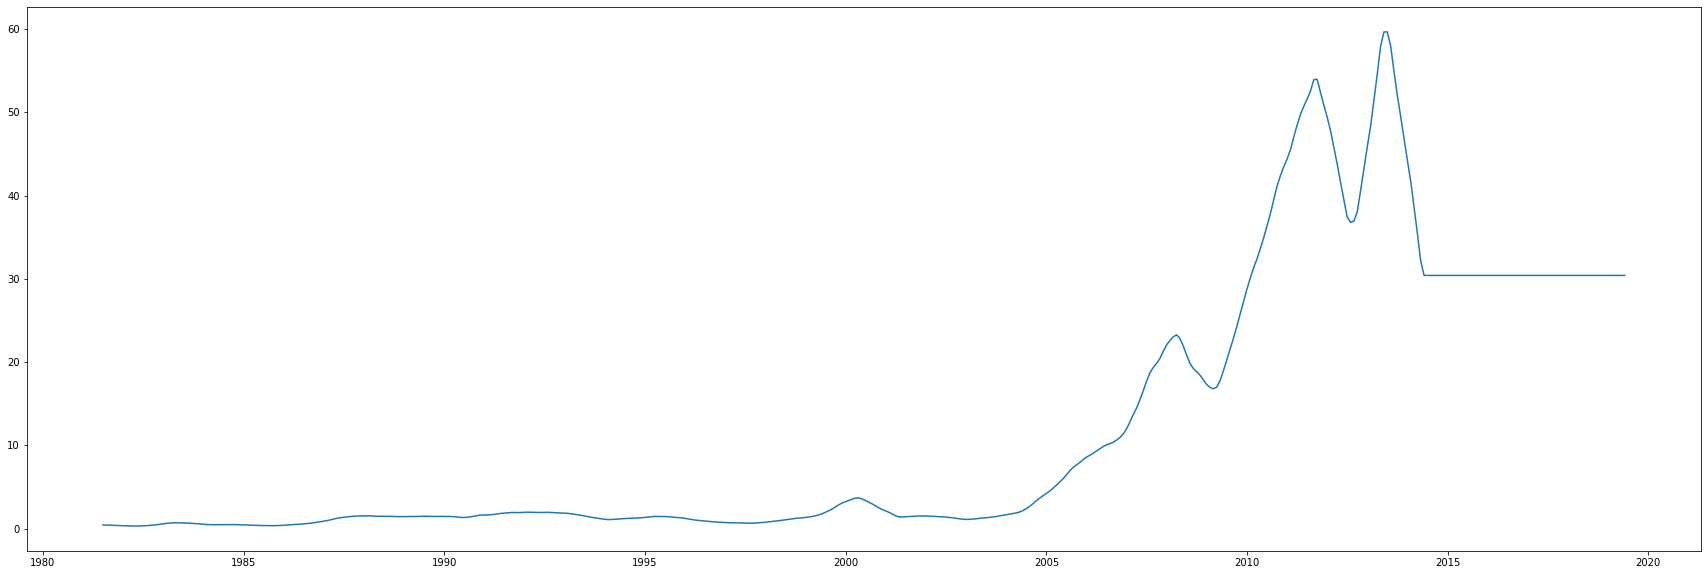

In [322]:
plt.figure(figsize=[30,10])
plt.plot(compo.trend)

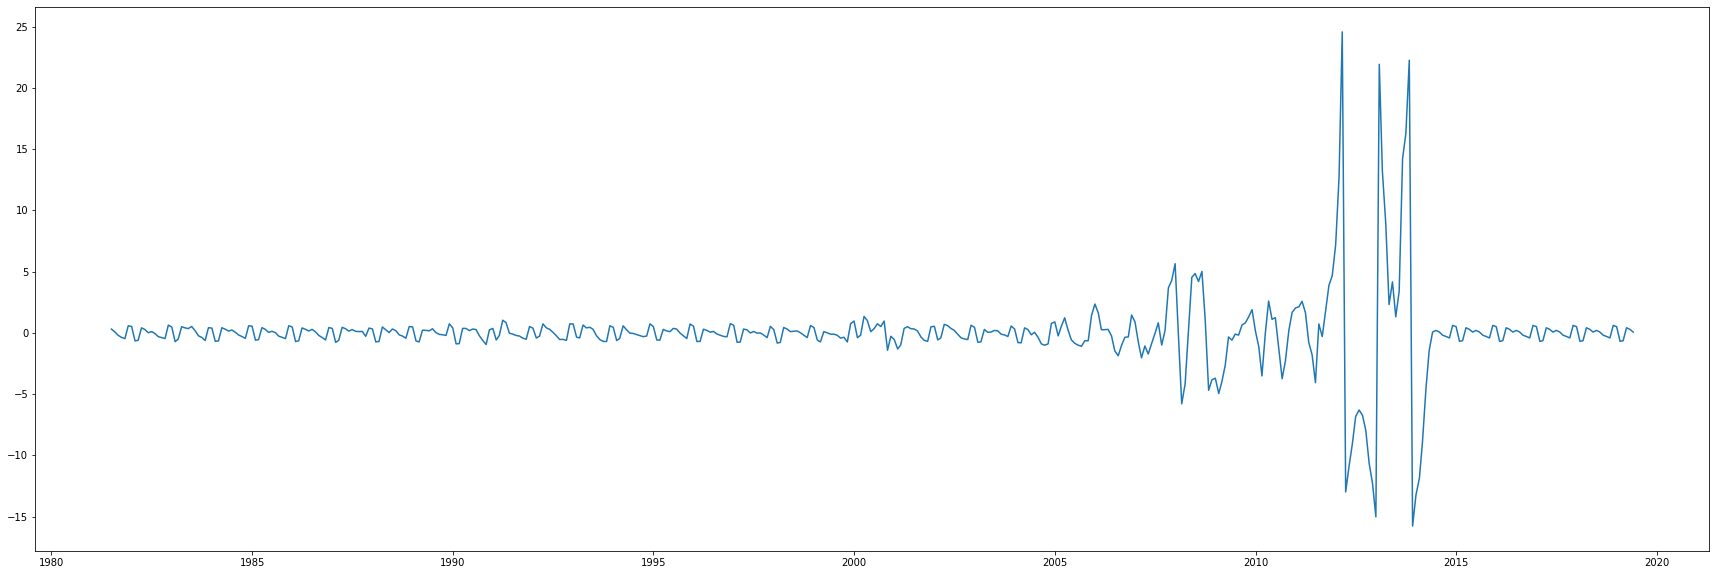

In [323]:
plt.figure(figsize=[30,10])
plt.plot(compo.resid)

In [324]:
file.isna().sum()

Close    1
dtype: int64

In [325]:
file['Close'].shape

(9823,)

In [326]:
file[file['Close'].isna()]

,Close
Date,
1981-08-10,NaN


In [327]:
file.index[12]

Timestamp('1980-12-31 00:00:00')

In [328]:
f2['Close'].rolling(12).mean()

Date
1980-12-31           NaN
1981-01-31           NaN
1981-02-28           NaN
1981-03-31           NaN
1981-04-30           NaN
                 ...    
2019-07-31    192.577545
2019-08-31    191.878515
2019-09-30    191.538625
2019-10-31    192.742030
2019-11-30    198.624496
Freq: M, Name: Close, Length: 468, dtype: float64

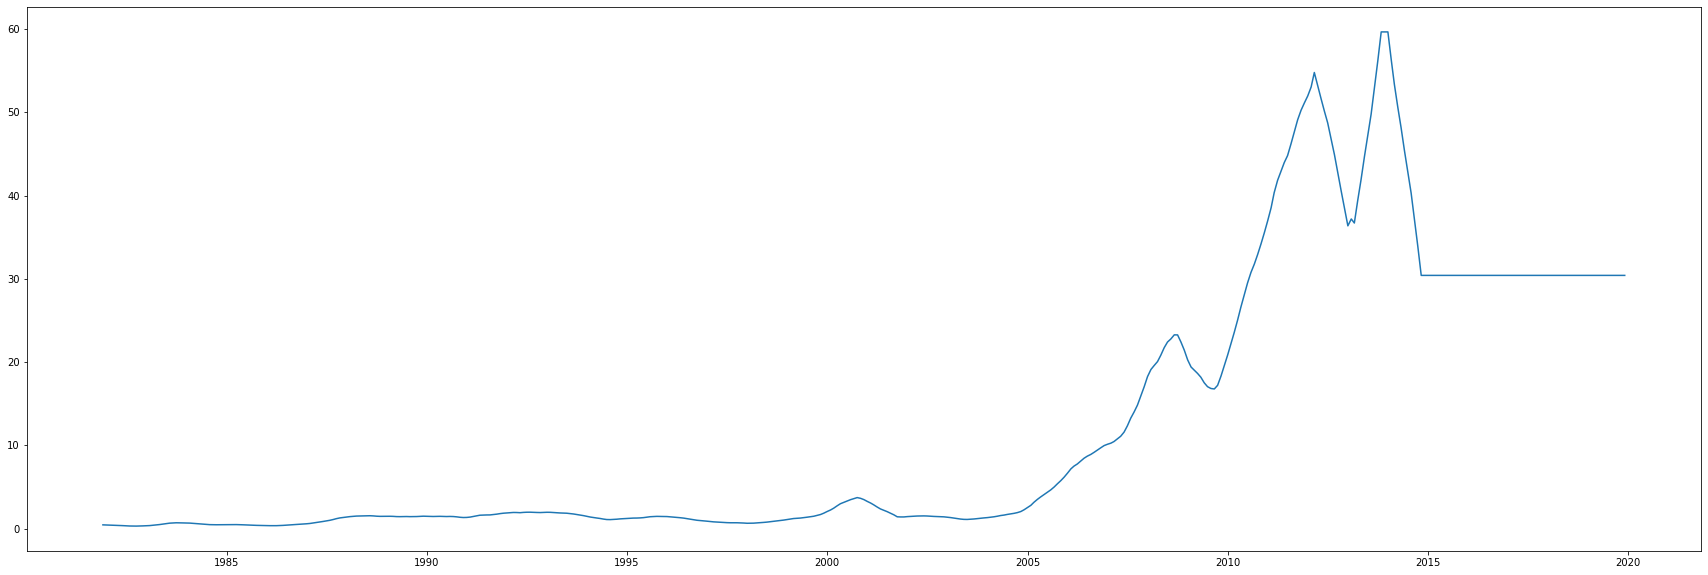

In [330]:
plt.figure(figsize=[30,10])
plt.plot(f3['Close'].rolling(12).mean())

In [331]:
f3['Close']-f3['Close'].rolling(12).mean()

Date
1980-12-31    NaN
1981-01-31    NaN
1981-02-28    NaN
1981-03-31    NaN
1981-04-30    NaN
             ... 
2019-07-31    0.0
2019-08-31    0.0
2019-09-30    0.0
2019-10-31    0.0
2019-11-30    0.0
Freq: M, Name: Close, Length: 468, dtype: float64

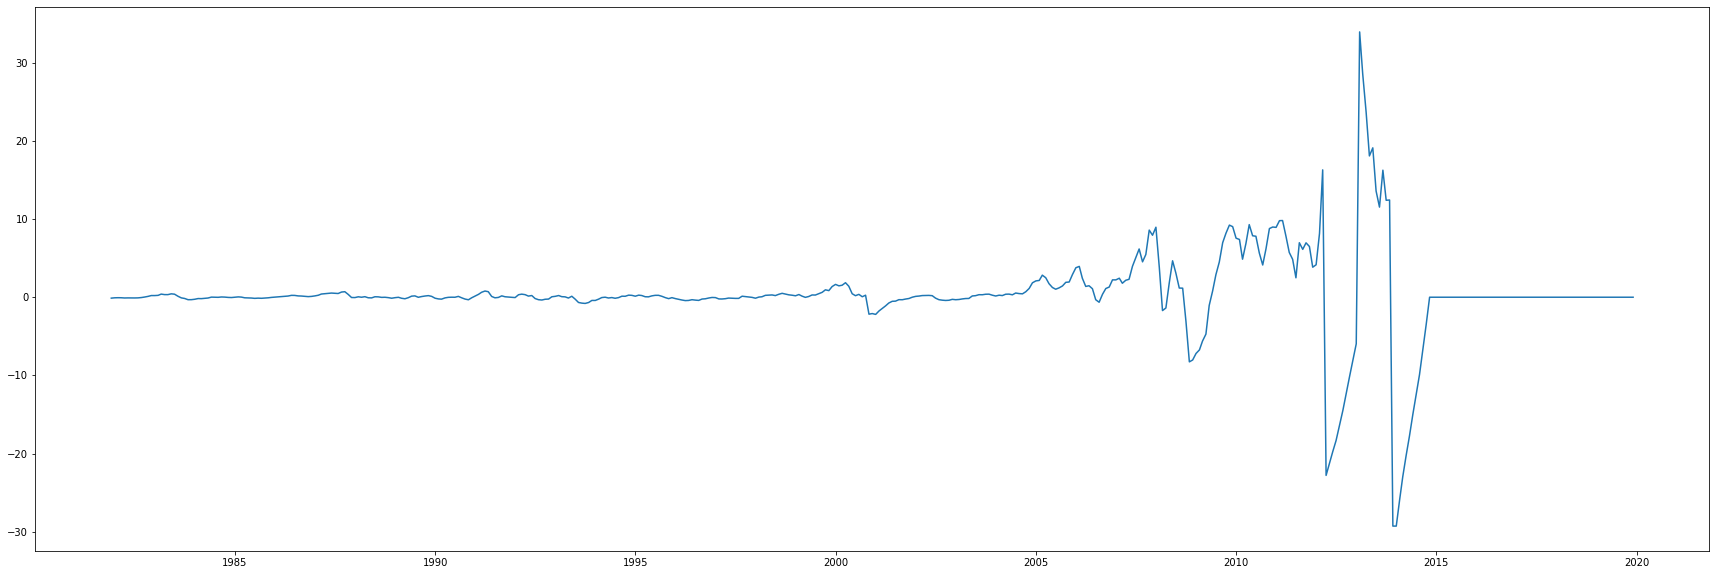

In [332]:
plt.figure(figsize=[30,10])
plt.plot(f3['Close']-f3['Close'].rolling(12).mean())

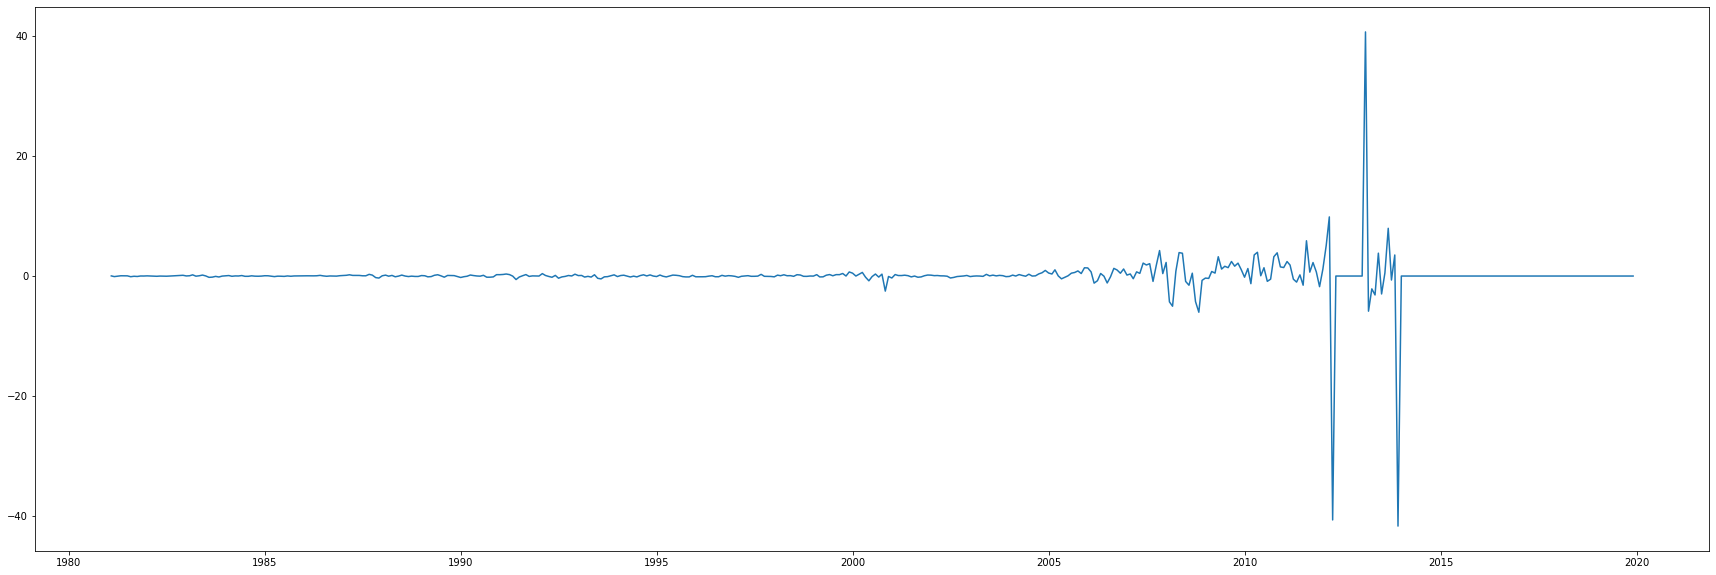

In [336]:
plt.figure(figsize=[30,10])
plt.plot(f3['Close']-f3['Close'].shift(1))

In [337]:
f3['Close']-f3['Close'].shift(1)

Date
1980-12-31         NaN
1981-01-31    0.021651
1981-02-28   -0.093694
1981-03-31   -0.028083
1981-04-30    0.042696
                ...   
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
2019-10-31    0.000000
2019-11-30    0.000000
Freq: M, Name: Close, Length: 468, dtype: float64

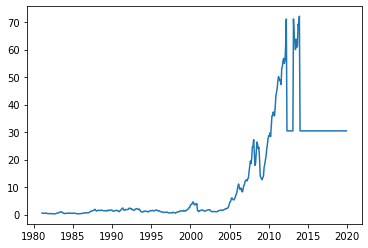

In [338]:
plt.plot(f3['Close'].shift(1))

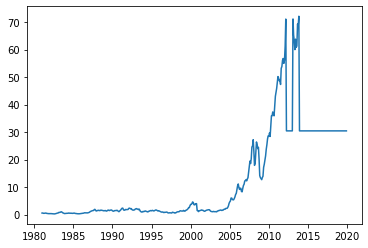

In [339]:
plt.plot(f3['Close'])

In [340]:
f3['Date']= f3.index

In [341]:
# list1= range(0,f2.shape)
range_= [x for x in range(0, f3['Close'].shape[0] )]

In [342]:
f3.shape

(468, 2)

In [344]:
# f3.set_index(range_,inplace=True)

In [343]:
f3.index.shape

(468,)

In [345]:
f3.index= range_

In [346]:
f3

,Close,Date
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31
4,0.486182,1981-04-30
...,...,...
463,30.424447,2019-07-31
464,30.424447,2019-08-31
465,30.424447,2019-09-30
466,30.424447,2019-10-31


In [347]:
f3.rename({'Close':'y', 'Date': 'ds'}, axis=1, inplace= True)

In [348]:
f3

,y,ds
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31
4,0.486182,1981-04-30
...,...,...
463,30.424447,2019-07-31
464,30.424447,2019-08-31
465,30.424447,2019-09-30
466,30.424447,2019-10-31


In [350]:
model= Prophet()

In [351]:
model.fit(f3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [352]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [353]:
future_dates= model.make_future_dataframe(periods= 24, freq='M')

In [354]:
future_dates

,ds
0,1980-12-31
1,1981-01-31
2,1981-02-28
3,1981-03-31
4,1981-04-30
...,...
487,2021-07-31
488,2021-08-31
489,2021-09-30
490,2021-10-31


In [356]:
f3.head(4)

,y,ds
0,0.543613,1980-12-31
1,0.565264,1981-01-31
2,0.471570,1981-02-28
3,0.443486,1981-03-31


In [357]:
prediction=model.predict(future_dates)

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


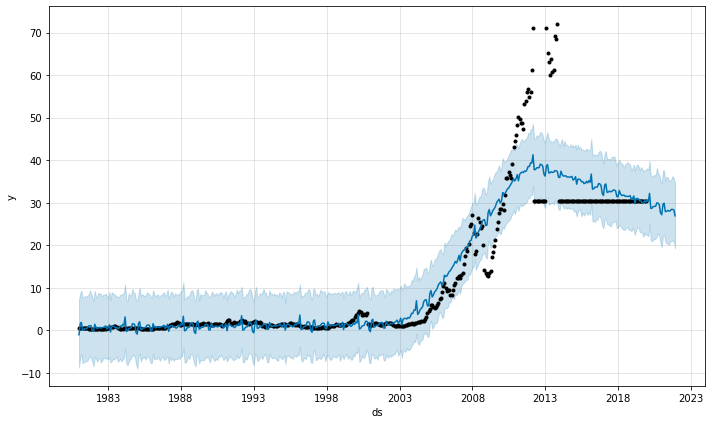

In [358]:
model.plot(prediction)
plt.show()

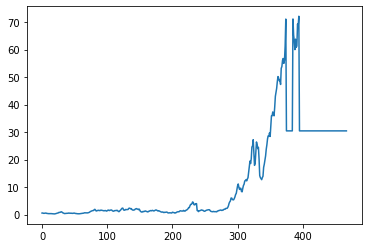

In [359]:
plt.plot(f3['y'])

In [360]:
file.tail()

,Close
Date,
2019-11-19,266.290009
2019-11-20,263.190002
2019-11-21,262.010010
2019-11-22,261.779999
2019-11-25,266.369995


In [361]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
480,2020-12-31,29.047945,19.546783,34.619409,28.862547,29.336061,-1.881591,-1.881591,-1.881591,-1.881591,-1.881591,-1.881591,0.0,0.0,0.0,27.166354
481,2021-01-31,28.951563,22.275374,37.636540,28.730384,29.285769,0.658256,0.658256,0.658256,0.658256,0.658256,0.658256,0.0,0.0,0.0,29.609819
482,2021-02-28,28.864508,22.593738,37.590945,28.609487,29.229705,1.012778,1.012778,1.012778,1.012778,1.012778,1.012778,0.0,0.0,0.0,29.877286
483,2021-03-31,28.768126,20.776535,35.113708,28.454968,29.184060,-0.862927,-0.862927,-0.862927,-0.862927,-0.862927,-0.862927,0.0,0.0,0.0,27.905199
484,2021-04-30,28.674852,20.513179,36.130665,28.320759,29.147691,-0.716431,-0.716431,-0.716431,-0.716431,-0.716431,-0.716431,0.0,0.0,0.0,27.958422
485,2021-05-31,28.578470,20.310907,35.962744,28.185020,29.104503,-0.387083,-0.387083,-0.387083,-0.387083,-0.387083,-0.387083,0.0,0.0,0.0,28.191387
486,2021-06-30,28.485197,20.126984,35.262012,28.061835,29.040324,-0.435809,-0.435809,-0.435809,-0.435809,-0.435809,-0.435809,0.0,0.0,0.0,28.049387
487,2021-07-31,28.388814,21.020406,35.055181,27.915367,28.994479,-0.309342,-0.309342,-0.309342,-0.309342,-0.309342,-0.309342,0.0,0.0,0.0,28.079472
488,2021-08-31,28.292432,20.916144,35.654913,27.764045,28.945840,0.166593,0.166593,0.166593,0.166593,0.166593,0.166593,0.0,0.0,0.0,28.459025
489,2021-09-30,28.199159,21.151228,36.245085,27.632655,28.903632,0.227233,0.227233,0.227233,0.227233,0.227233,0.227233,0.0,0.0,0.0,28.426392


C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


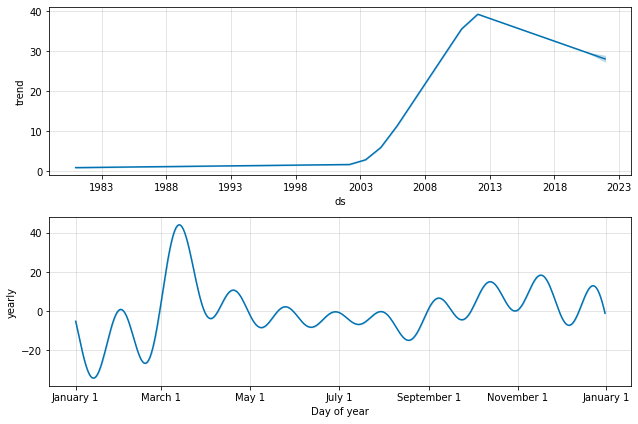

In [362]:
model.plot_components(prediction)
plt.show()

In [182]:
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
# df_cv.head()

# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv)
# df_p.head()

# from fbprophet.plot import plot_cross_validation_metric
# fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [363]:
from fbprophet.diagnostics import cross_validation


In [364]:
df_cv=cross_validation(model,horizon='365 days')

INFO:fbprophet:Making 70 forecasts with cutoffs between 1984-06-08 12:00:00 and 2018-11-30 00:00:00


  0%|          | 0/70 [00:00<?, ?it/s]

C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Asus\anaconda31\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users

In [ ]:
prediction[]

In [365]:
df_cv.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1984-06-30,0.840456,0.641232,1.045978,0.508397,1984-06-08 12:00:00
1,1984-07-31,0.688657,0.485002,0.896224,0.463329,1984-06-08 12:00:00
2,1984-08-31,0.617792,0.411349,0.820635,0.498253,1984-06-08 12:00:00
3,1984-09-30,0.429314,0.211528,0.633480,0.476386,1984-06-08 12:00:00
4,1984-10-31,0.466441,0.255708,0.667302,0.443032,1984-06-08 12:00:00
5,1984-11-30,0.487863,0.272075,0.686158,0.432823,1984-06-08 12:00:00
6,1984-12-31,0.760262,0.559582,0.975187,0.481250,1984-06-08 12:00:00
7,1985-01-31,0.804270,0.607894,1.015176,0.522423,1984-06-08 12:00:00
8,1985-02-28,0.667700,0.480548,0.876917,0.501645,1984-06-08 12:00:00
9,1985-03-31,0.672801,0.468690,0.858667,0.406144,1984-06-08 12:00:00


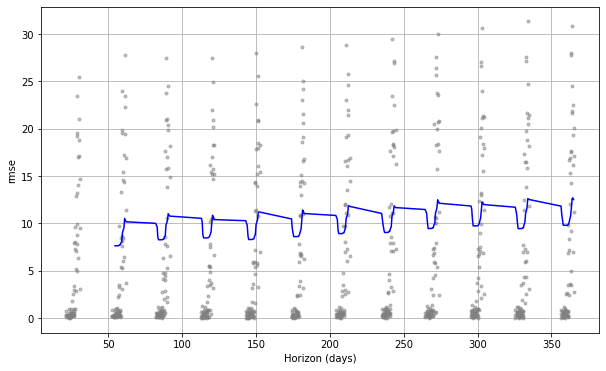

In [366]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [367]:
f2

,Close
Date,
1980-12-31,0.543613
1981-01-31,0.565264
1981-02-28,0.471570
1981-03-31,0.443486
1981-04-30,0.486182
...,...
2019-07-31,205.216364
2019-08-31,204.957728
2019-09-30,217.994999


In [371]:
f3['y']-prediction['yhat'][:468]

0      1.578385
1     -0.942922
2     -1.393947
3      0.450564
4      0.343753
         ...   
463    0.001843
464    0.462795
465    0.375080
466   -0.053056
467    0.297128
Length: 468, dtype: float64

In [372]:
f3.columns

Index(['y', 'ds'], dtype='object')

## 

<AxesSubplot:>

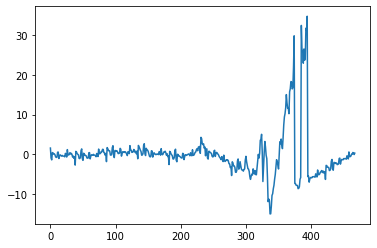

In [373]:
(f3['y']-prediction['yhat'][:468]).plot()

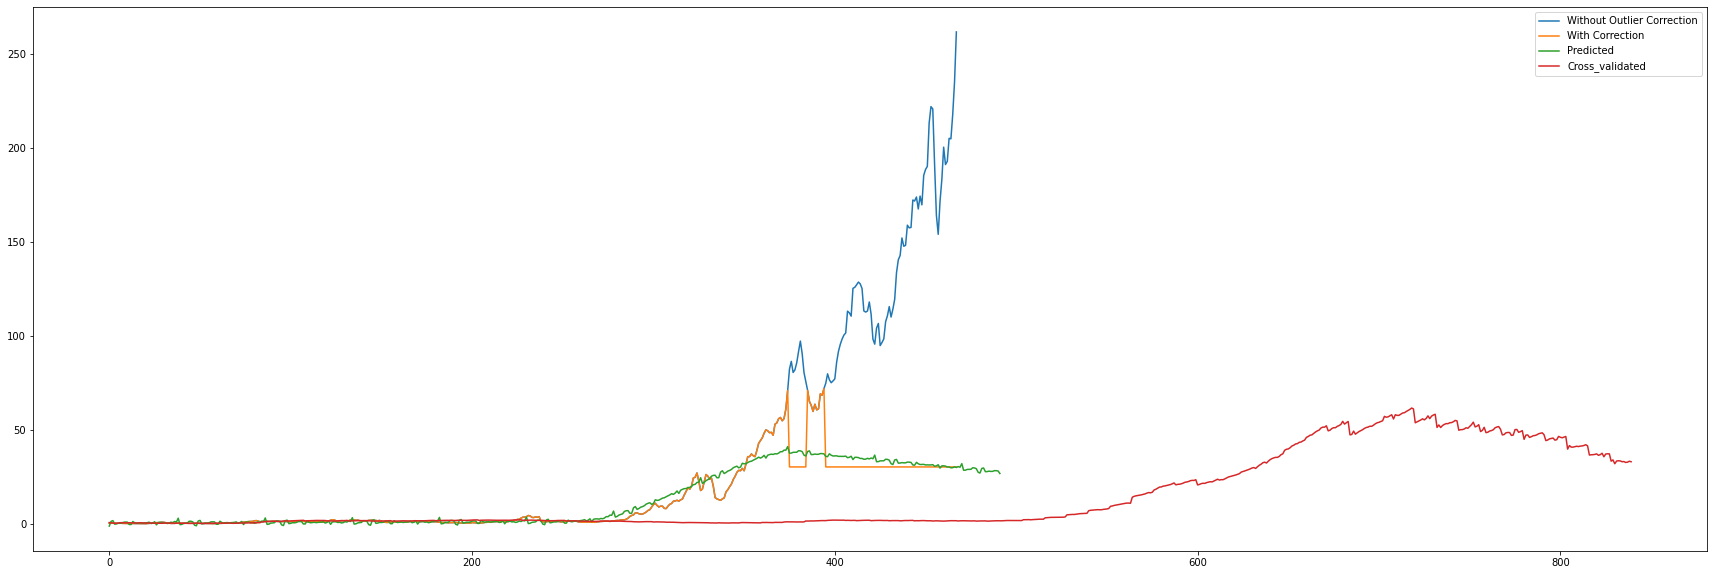

In [378]:
plt.figure(figsize= [30,10])
plt.plot(f2['Close'].values, label="Without Outlier Correction")
plt.plot(f3['y'], label= 'With Correction')
plt.plot(prediction['yhat'], label= 'Predicted')
plt.plot(df_cv['yhat'], label= 'Cross_validated')

plt.legend()

In [379]:
df_cv.shape

(840, 6)

In [380]:
df_p['mape'].mean()

0.45042518645265267

In [381]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,54 days 12:00:00,58.187614,7.628081,4.112566,0.382347,0.333748,0.458333
1,55 days 00:00:00,58.187123,7.628048,4.113619,0.374267,0.333748,0.452381
2,55 days 12:00:00,58.206031,7.629288,4.133760,0.392498,0.369758,0.422619
3,56 days 00:00:00,58.211552,7.629650,4.139591,0.393839,0.381871,0.416667
4,56 days 12:00:00,58.269765,7.633463,4.167880,0.401690,0.395682,0.428571
...,...,...,...,...,...,...,...
190,363 days 00:00:00,117.022036,10.817672,6.896124,0.463428,0.456580,0.273810
191,363 days 12:00:00,135.361366,11.634490,7.557431,0.474519,0.464245,0.250000
192,364 days 00:00:00,159.408436,12.625705,8.278759,0.489138,0.480114,0.250000
193,364 days 12:00:00,161.120595,12.693329,8.421865,0.485117,0.495264,0.261905
